In [ ]:
# import libraries
from scipy import stats
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

The datasets can be found at https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey?select=demographic.csv.

They are from the 2013-2014 National Health and Nutrition Examination Survey (NHANES) from the Centers for Disease Control and Prevention (CDC).

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# read csv files
demographic_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/demographic.csv')
questionnaire_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/questionnaire.csv')

In [ ]:
# merge dataframes
merged_df = questionnaire_df.merge(demographic_df, how='left', on='SEQN').dropna(axis=0, subset=['RIAGENDR', 'SMD100NI', 'SMD650'])

In [ ]:
# info about dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 43 to 10161
Columns: 999 entries, SEQN to INDFMPIR
dtypes: float64(972), int64(25), object(2)
memory usage: 6.2+ MB


In [ ]:
# column names
merged_df.columns

Index(['SEQN', 'ACD011A', 'ACD011B', 'ACD011C', 'ACD040', 'ACD110', 'ALQ101',
       'ALQ110', 'ALQ120Q', 'ALQ120U',
       ...
       'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU',
       'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR'],
      dtype='object', length=999)

In [ ]:
# first 5 rows
merged_df.head()

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,ALQ151,ALQ160,BPQ020,BPQ030,BPD035,BPQ040A,BPQ050A,BPQ056,BPD058,BPQ059,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,CBD070,CBD090,CBD110,CBD120,CBD130,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ580,HSQ590,...,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
43,73600,1.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,5.0,2.0,1.0,2.0,0.0,1.0,1.0,15.0,1.0,2.0,2.0,NaN,1.0,2.0,2.0,NaN,NaN,NaN,642.0,0.0,85.0,128.0,128.0,3.0,2.0,2.0,2.0,2.0,NaN,1.0,...,4,2.0,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,3.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,6,6,0,3,0,1,37,1.0,3.0,3.0,NaN,19725.408052,20786.063147,1,114,5.0,5.0,0.63
58,73615,NaN,NaN,NaN,2.0,NaN,1.0,NaN,1.0,2.0,2.0,0.0,NaN,2.0,NaN,1.0,1.0,65.0,1.0,1.0,2.0,NaN,2.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,2.0,2.0,NaN,1.0,...,2,2.0,NaN,2.0,NaN,2,1.0,8.0,NaN,1.0,2.0,NaN,2,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1,0,0,1,2,65,2.0,1.0,2.0,NaN,10950.248806,10872.080055,1,104,3.0,3.0,1.22
74,73631,1.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,2.0,0.0,NaN,2.0,1.0,1.0,1.0,54.0,1.0,2.0,2.0,NaN,1.0,2.0,1.0,2.0,2.0,NaN,135.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,2.0,2.0,NaN,2.0,...,4,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,2.0,3.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1,1,0,0,0,2,56,1.0,2.0,3.0,NaN,26678.260372,29752.936842,1,111,2.0,2.0,0.71
77,73634,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,60.0,1.0,1.0,1.0,52.0,2.0,2.0,1.0,1.0,2.0,NaN,450.0,0.0,107.0,857.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,NaN,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,2.0,NaN,1,1.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,3,3,0,0,1,1,65,1.0,3.0,2.0,NaN,14047.623960,0.000000,2,113,6.0,6.0,1.52
85,73642,1.0,NaN,NaN,NaN,NaN,2.0,1.0,0.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,104.0,2.0,1.0,NaN,1.0,1.0,2.0,300.0,20.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,2.0,NaN,2.0,...,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,3,3,0,0,0,1,55,1.0,1.0,1.0,3.0,33644.734694,34652.391419,2,115,8.0,8.0,2.27


In [ ]:
# count of men (1) and women (2)
men = merged_df.iloc[(merged_df['RIAGENDR'] == 1).values].dropna(axis=0, subset=['RIAGENDR', 'SMD100NI', 'SMD650'])
men.info()

women = merged_df.iloc[(merged_df['RIAGENDR'] == 2).values].dropna(axis=0, subset=['RIAGENDR', 'SMD100NI', 'SMD650'])
women.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 43 to 10146
Columns: 999 entries, SEQN to INDFMPIR
dtypes: float64(972), int64(25), object(2)
memory usage: 3.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 58 to 10161
Columns: 999 entries, SEQN to INDFMPIR
dtypes: float64(972), int64(25), object(2)
memory usage: 2.7+ MB


The number of observations for men is 459 and the number of observations for women is 359. They are close enough in number to be able to conduct a two-tail independent samples t-test on them.

In [ ]:
# check for nulls
men['SMD100NI'].isna().sum()
men['RIAGENDR'].isna().sum()
men['SMD650'].isna().sum()

0

In [ ]:
# check for nulls
women['SMD100NI'].isna().sum()
women['RIAGENDR'].isna().sum()
women['SMD650'].isna().sum()

0

In [ ]:
# descriptive statistics for men
men['SMD100NI'].describe()

count    459.000000
mean       0.998039
std        0.180781
min        0.500000
25%        0.900000
50%        1.000000
75%        1.100000
max        2.000000
Name: SMD100NI, dtype: float64

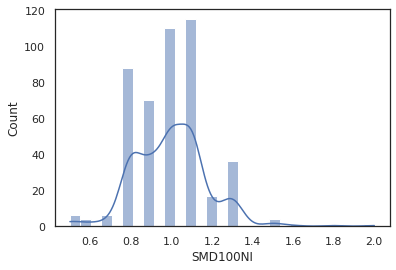

In [ ]:
# histogram for men
sns.histplot(men['SMD100NI'], kde='True')
sns.set_style("white")

In [ ]:
# descriptive statistics for women
women['SMD100NI'].describe()

count    359.000000
mean       1.003621
std        0.215368
min        0.100000
25%        0.900000
50%        1.000000
75%        1.100000
max        2.000000
Name: SMD100NI, dtype: float64

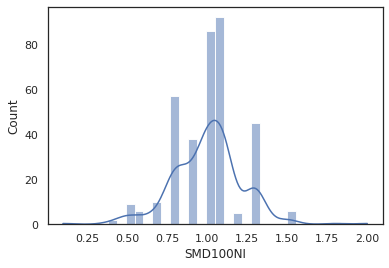

In [ ]:
# histogram for women
sns.histplot(women['SMD100NI'], kde='True')
sns.set_style("white")

The distributions above show that the mean nicotine content in the cigarettes men and women smoke is about the same at 1 mg.

The cigarettes female participants smoked have a slightly higher nicotine content on average.

Nicotine content for women has a more normal distribution because there are more observations in the middle of the histogram and fewer observations on both sides.

The minimum nicotine content observed for men was higher at 0.5 mg. For women, the minimum observed was 0.1 mg.

In [ ]:
# t-test for nicotine content between men and women
stats.ttest_ind(men['SMD100NI'], women['SMD100NI'], nan_policy='omit')

Ttest_indResult(statistic=-0.4027603514257731, pvalue=0.687230024102469)

The null hypothesis is that there is no significant difference between the nicotine content in the cigarettes smoked by men and the cigarettes smoked by women. The alternative hypothesis is that there is a significant difference.

Fail to reject the null hypothesis. There is no significant difference between the populations at the 0.05 level because the p-value is greater at 0.68.

There is no significant difference between the nicotine content in the cigarettes smoked by men and the cigarettes smoked by women.

In [ ]:
# confindence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(men['SMD100NI'], women['SMD100NI'])

'The difference in means at the 95% confidence interval (two-tail) is between -0.022164612271531277 and 0.03332852073185139.'

As the output states, with 95% confidence, the difference in mean nicotine content is between -0.02 and -0.03.

Text(0.5, 1.0, 'Nicotine Content Consumed by Men vs. Women')

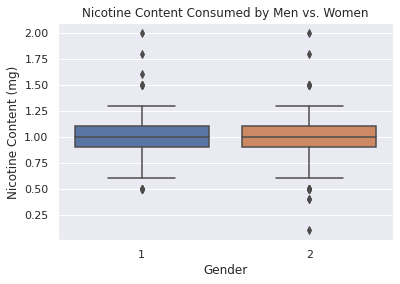

In [ ]:
# boxplots
sns.boxplot(y="SMD100NI", x="RIAGENDR", data=merged_df)
plt.xlabel('Gender')
plt.ylabel('Nicotine Content (mg)')
plt.title('Nicotine Content Consumed by Men vs. Women')

The boxplots of the distributions of nicotine content in the cigarettes smoked by men vs. women intersect, which supports the results of the t-test.

This is further evidence that there is no significant difference between the two populations when it comes to nicotine content.

In [ ]:
# statistical significance of correlation
stats.pearsonr(merged_df['SMD100NI'], merged_df['SMD650'])

(0.005857743012613077, 0.867149120553734)

The null hypothesis is that there is no correlation between nicotine content and number of cigarettes smoked per day. The alternative hypothesis is that there is a correlation.

Fail to reject the null that there is no correlation between nicotine content and number of cigarettes smoked per day; r = 0.01, which is essentially zero, meaning there is no correlation.

The correlation is not statistically significant at the 0.05 level because the p-value is larger at 0.87.

Nicotine content is not related to the number of cigarettes smoked per day or vice versa.

Text(0.5, 1.0, 'Nicotine Content vs. Number of Cigarettes')

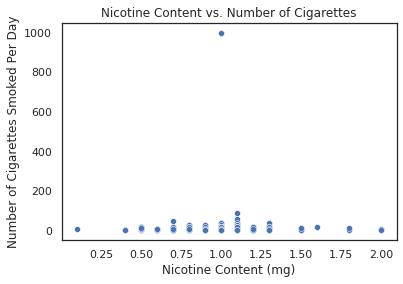

In [ ]:
# scatterplot of correlation
sns.scatterplot(x="SMD100NI", y="SMD650", data=merged_df)
sns.set_style("white")
plt.xlabel('Nicotine Content (mg)')
plt.ylabel('Number of Cigarettes Smoked Per Day')
plt.title('Nicotine Content vs. Number of Cigarettes')

For those in the healthcare field, this is evidence that there is no difference between the nicotine content in the cigarettes that men smoke and the cigarettes that women smoke. They should also note that there is no relationship between nicotine content in cigarettes and the number of cigarettes smoked per day.

In other words, gender is not a risk factor for smoking cigarettes with more nicotine, and higher nicotine content is not a risk factor for smoking more cigarettes or vice versa.